# Gradient Descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. i.e, $\theta_{n+1} = \theta_n -\alpha \nabla f(\theta_n)$.

Example: For a function $f(x)=x^{4}-3x^{3}+2$, with derivative $f'(x)=4x^{3}-9x^{2}$, the gradient descent algorithm will solve for $f'(x)=0$ whose solutions shows that the function has a plateau at x = 0 and a global minimum at $x=\theta={\tfrac {9}{4}}=2.25$. 

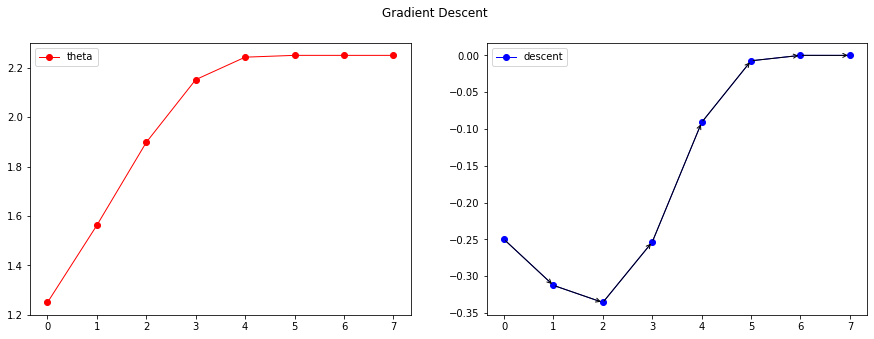

Number of steps 8
Minimum at 2.25
-----
CPU times: user 478 ms, sys: 44.8 ms, total: 523 ms
Wall time: 559 ms


In [3]:
%%time
import matplotlib.pyplot as plt

theta = 1  # We start the search at x=6
alpha = 0.05  # Step size multiplier, learning rate
precision = 0.00001  # Desired precision of result
max_iters = 10000  # Maximum number of iterations

# Derivative function
df = lambda x: 4 * x**3 - 9 * x**2

X = []
descent = []
thetaS = []

for i in range(max_iters):
    X.append(i)
    theta_n = theta
    theta = theta_n - alpha * df(theta_n) # steps are propagated to negative of the gradient of the f(x)
    thetaS.append(theta)
    diff = theta_n - theta
    descent.append(diff)     
    if abs(diff) <= precision:
        break
        
fig,(ax0, ax1) = plt.subplots(1,2, figsize=(15,5))
ax0.plot(X, thetaS, color='red', label='theta',marker='o', linewidth=1.0)
ax1.plot(X, descent, color='blue', label='descent', marker='o', linewidth=1.0)

for j in range(1, len(X)):
    ax1.annotate("", xy=(X[j], descent[j]), xytext=(X[j-1], descent[j-1]),
                 arrowprops=dict(arrowstyle="->"), color='blue')

ax0.legend()
ax1.legend()
fig.suptitle('Gradient Descent')
plt.show()
print("Number of steps", len(descent))
print("Minimum at", round(theta, 3))
print("-----")

### Questions
1. What happen if we choose the initial value of $\theta=0$? You should be able to answer without running the code.
2. Write a table of $\theta$ and number of steps required to reach minimum, and wall time for $\alpha$ = 0.005, 0.01, and 0.05. Which choice is appropriate for this case?

|$\alpha$  |$\theta$  | steps   | Wall time (ms) | 
|  ------  |  ------  | ------  |  ------        |        
|   0.005  |    xx    |   yy    |                |     
|    0.01  |    xx    |   yy    |                |  
|    0.05  |    xx    |   yy    |                |  

# Batch gradient descent algorithm

For a hypothesis given by the linear model: $h_{\theta}(x) = {\theta}^{T} x = \theta_{0} + \theta_{1} x_1$, the cost function define as 
\begin{equation*} J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta}(x^i)-(y^i))^2\end{equation*}
where m is the number of training dataset, $x^i, y^i$ with $i=0, 1, ..., m$.

In regression the aim is to minimize the cost function to obtain parameters $\theta$. One way to do this is to use batch gradient descent algorithm, where the values of $\theta$ are updated during each iteration, such as $ J(\theta)$ decreases.
\begin{equation*} \theta_j = \theta_i - \alpha \frac{1}{2m} \sum^m_{i=1} (h_{\theta}(x^i)-(y^i))^2\end{equation*}

With each iteration, the parameter $\theta$ comes closer to the optimal values that will achieve the lowest cost $J(\theta)$. $\alpha$ is called the training rate.

Epoch 0 | Cost: 181.419650 | Theta0: 0.000000 | Theta1: 0.000000
Epoch 1 | Cost: 92.885765 | Theta0: 0.016951 | Theta1: 0.320957
Epoch 2 | Cost: 47.739301 | Theta0: 0.029231 | Theta1: 0.550143
Epoch 3 | Cost: 24.717481 | Theta0: 0.038176 | Theta1: 0.713794
Epoch 4 | Cost: 12.977728 | Theta0: 0.044739 | Theta1: 0.830647
Epoch 5 | Cost: 6.991065 | Theta0: 0.049601 | Theta1: 0.914083
Epoch 6 | Cost: 3.938088 | Theta0: 0.053249 | Theta1: 0.973655
Epoch 7 | Cost: 2.381091 | Theta0: 0.056028 | Theta1: 1.016186
Epoch 8 | Cost: 1.586944 | Theta0: 0.058189 | Theta1: 1.046549
Epoch 9 | Cost: 1.181798 | Theta0: 0.059907 | Theta1: 1.068222
THETA [0.06130877 1.08368901]
CPU times: user 199 ms, sys: 7.73 ms, total: 207 ms
Wall time: 202 ms


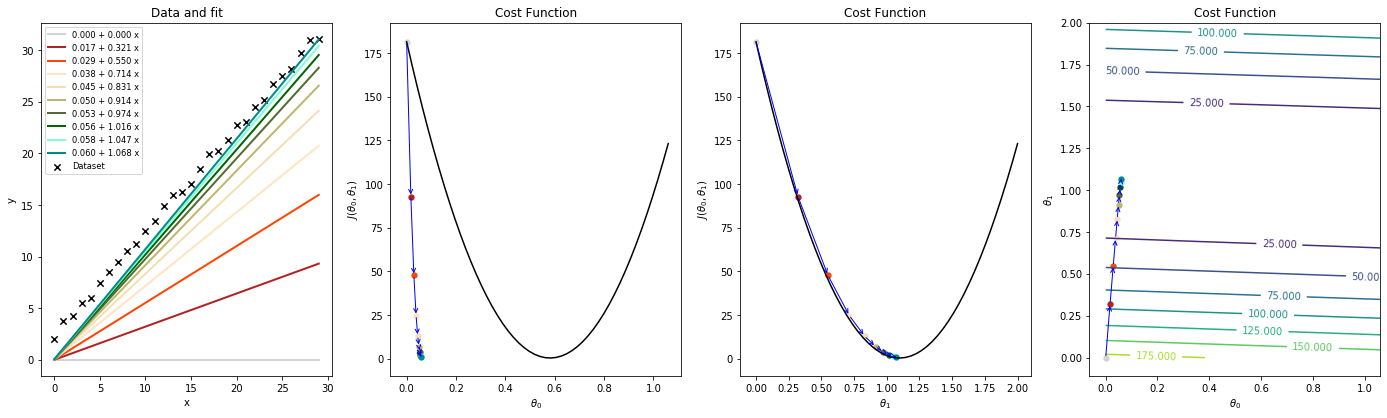

In [5]:
%%time
import numpy as np
import random
import matplotlib.pyplot as plt
######################################
import matplotlib.colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv] #156 color names
######################################

def genData(numPoints, bias, variance):
    '''a straight line with some bias and noise'''
    x = np.zeros(shape=(numPoints, 2)) #[[0, 0], [0, 0],..., [0, 0]]
    y = np.zeros(shape=numPoints) #[0, 0, ..., 0]
    for i in range(0, numPoints):
        x[i][0] = 1
        x[i][1] = i       
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

def gradientDescent(x, y, theta, alpha, m, epochs):
    xTrans = x.transpose()
    for i in range(0, epochs):
        theta_a.append(theta) 
        hypothesis = np.dot(x, theta)
        hypothesis_a.append(hypothesis)
        res = hypothesis - y
        cost = np.average(res**2, axis=0)/2
        cost_a.append(cost)        
        gradient = np.dot(xTrans, res) / m       
        print("Epoch %d | Cost: %2f | Theta0: %2f | Theta1: %2f"  % (i, cost, theta[0], theta[1]))
        theta = theta - alpha * gradient           
    return theta, hypothesis_a, cost_a, theta_a

def cost_func_1D(theta_grid):
    '''
    Creates the grid for the J(\theta) vs theta plots
    '''
    xTrans = x.transpose()
    hypothesis = np.dot(theta_grid, xTrans)
    res = hypothesis - y
    cost_grid = np.average(res**2, axis=1)/(2)
    return cost_grid


def cost_func_2D(theta0, theta1):
    '''
    Method to setup the grid for contours. As I couldn't do the 
    np.tensordot method correctly, I used the alternative approach
    to make a nxn matrix of the cost function following from 
    https://scipython.com/blog/visualizing-the-gradient-descent-method/
    '''
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    hypothesis =  theta0 + theta1*x[:,1]
    res = hypothesis - y
    cost_grid = np.average(res**2, axis=2)/(2)
    return cost_grid 


# gen some data points 
x, y = genData(30, 2, 1)   #(100, 25, 10)
#print('x shape:', x.shape) # m x n matrix
#print('y shape:', y.shape) # m vector

m, n = np.shape(x)      # m rows, n columns
epochs = 10       #15
alpha = 0.001           #0.005

theta = np.zeros(n)     #choice, one can start with np.ones(n) 
#theta = np.ones(n)

# following will be used for visualizaton
hypothesis_a = []
cost_a = []
theta_a = []

# call the main function
theta, hypothesis_a, cost_a, theta_a = gradientDescent(x, y, theta, alpha, m, epochs)
print('THETA', theta)

###################
# visualization
###################

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24,6.5))

ax[0].scatter(x[:,1], y, marker='x', s=40, color='k', label='Dataset')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Data and fit')

ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$J(\theta_0,\theta_1)$')
ax[1].set_title('Cost Function')

ax[2].set_xlabel(r'$\theta_1$')
ax[2].set_ylabel(r'$J(\theta_0,\theta_1)$')
ax[2].set_title('Cost Function')

ax[3].set_xlabel(r'$\theta_0$')
ax[3].set_ylabel(r'$\theta_1$')
ax[3].set_title('Cost Function')

#grid for plotting
theta0_grid = np.linspace(0,1.06,50) 
theta1_grid = np.linspace(0,2.00,50)

theta_grid = np.vstack((theta0_grid, theta1_grid)).T
#print ('theta_grid shape:', theta_grid.shape)

J_grid_1D = cost_func_1D(theta_grid)
#print ('J_grid_1D shape:', J_grid_1D.shape)

J_grid_2D = cost_func_2D(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])
#print ('J_grid_2D shape:', J_grid_2D.shape)

ax[1].plot(theta0_grid, J_grid_1D, 'k')
ax[2].plot(theta1_grid, J_grid_1D, 'k')

for j in range(0, epochs):
    if   epochs < 30:  c = j*10+10
    elif epochs < 50:  c = j*10
    else                   :  c = j    
    ax[0].plot(x[:,1], hypothesis_a[j], color=sorted_names[c], lw=2, 
               label=r'{0:.3f} + {1:.3f} x'.format(theta_a[j][0], theta_a[j][1]))
    ax[1].scatter(theta_a[j][0], cost_a[j], color=sorted_names[c], s=40, lw=0)
    ax[2].scatter(theta_a[j][1], cost_a[j], color=sorted_names[c], s=40, lw=0)
    ax[3].scatter(*theta_a[j], color=sorted_names[c], s=40, lw=0)
    
    # juggling such as arrow from last point will not point to first point in annotation
    if j==0: k=0
    else: k=j-1
        
    # draw the arrows showing the step direction on cost function as a function of fit parameters    
    ax[1].annotate('', xy=(theta_a[j][0], cost_a[j]), xytext=(theta_a[k][0], cost_a[k]),
                   arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                   va='center', ha='center')    
    ax[2].annotate('', xy=(theta_a[j][1], cost_a[j]), xytext=(theta_a[k][1], cost_a[k]),
                   arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                   va='center', ha='center')    
    ax[3].annotate('', xy=theta_a[j], xytext=theta_a[k],
                   arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1},
                   va='center', ha='center')
    
    
# legend
ax[0].legend(loc='upper left', fontsize='small')

# The target parameter values indicated on the cost function contour plot
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[3].contour(X, Y, J_grid_2D)
ax[3].clabel(contours)

# One can have an idea of grid beforehand
S = np.sqrt(np.square(X) + np.square(Y))
cm = plt.cm.get_cmap('viridis')
#ax[3].scatter(X, Y, c=S, cmap=cm)



### Questions
1. What do you observe if we generate 50 data points rather than 30? Will the fit converge faster?
2. Will the fit converge faster if initial values of Theta are choosen as (1,1)?
3. Write a table of $\theta$ and number of steps required to reach minimum, and wall time for $\alpha$ = 0.005, 0.001, 0.05, and 0.01. Which choice is appropriate for this case?

|$\alpha$  |$\theta$  | steps   | Wall time (ms) | 
|  ------  |  ------  | ------  |  ------        |           
|   0.005  |    xx    |   yy    |                | 
|   0.001  |    xx    |   yy    |                | 
|    0.05  |    xx    |   yy    |                |  
|    0.01  |    xx    |   yy    |                | 

4. What happens when bias and vairance are set to zero? Does the fit converges faster?
5. For bias = 2, and variance = 1, what is the effect on $\theta$ estimates by increasing the number of iterations? 